<a href="https://colab.research.google.com/github/akshitsingh07/Image-Classification-on-Imbalanced-Dataset/blob/main/Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import auc, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the input data to (num_samples, height, width, num_channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Split the dataset into training and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Create a new unbalanced dataset by removing samples from classes 0 and 1
remove_idx = np.concatenate([np.where(y_train==0)[0][:int(len(y_train[y_train==0])*0.8)], 
                              np.where(y_train==1)[0][:int(len(y_train[y_train==1])*0.8)]])
x_train = np.delete(x_train, remove_idx, axis=0)
y_train = np.delete(y_train, remove_idx, axis=0)

In [ ]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=x_train[0].shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the unbalanced training dataset
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1247/1247 [==============================] - 34s 26ms/step - loss: 0.6205 - accuracy: 0.9326 - val_loss: 0.1745 - val_accuracy: 0.9542
Epoch 2/10
1247/1247 [==============================] - 30s 24ms/step - loss: 0.0893 - accuracy: 0.9746 - val_loss: 0.1559 - val_accuracy: 0.9635
Epoch 3/10
1247/1247 [==============================] - 23s 18ms/step - loss: 0.0724 - accuracy: 0.9775 - val_loss: 0.1418 - val_accuracy: 0.9657
Epoch 4/10
1247/1247 [==============================] - 22s 18ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.1493 - val_accuracy: 0.9664
Epoch 5/10
1247/1247 [==============================] - 23s 18ms/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.1730 - val_accuracy: 0.9635
Epoch 6/10
1247/1247 [==============================] - 23s 18ms/step - loss: 0.0533 - accuracy: 0.9845 - val_loss: 0.1755 - val_accuracy: 0.9638
Epoch 7/10
1247/1247 [==============================] - 22s 18ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.2340 -

In [ ]:
# Predict the test set
y_pred = model.predict(x_test)

# Convert the probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy, recall, precision, and F1 score for each class
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Classification Report:\n{report}")

313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[ 940    0    3    0    3    1   16    1   12    4]
 [   0 1100    7    2    1    1    8    1   14    1]
 [   1    1 1001    2    4    0    4   10    4    5]
 [   0    0    1  990    0    8    0    4    3    4]
 [   0    1    0    0  939    0    7    4    6   25]
 [   0    0    0   11    0  873    3    1    2    2]
 [   4    1    0    2    5    4  939    0    3    0]
 [   0    4   15    4    3    0    0  980    6   16]
 [   3    2    6    5    3    6    4    4  934    7]
 [   0    3    0    2    7    4    0    5    1  987]]
Accuracy: 0.968
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.9

313/313 [==============================] - 2s 6ms/step


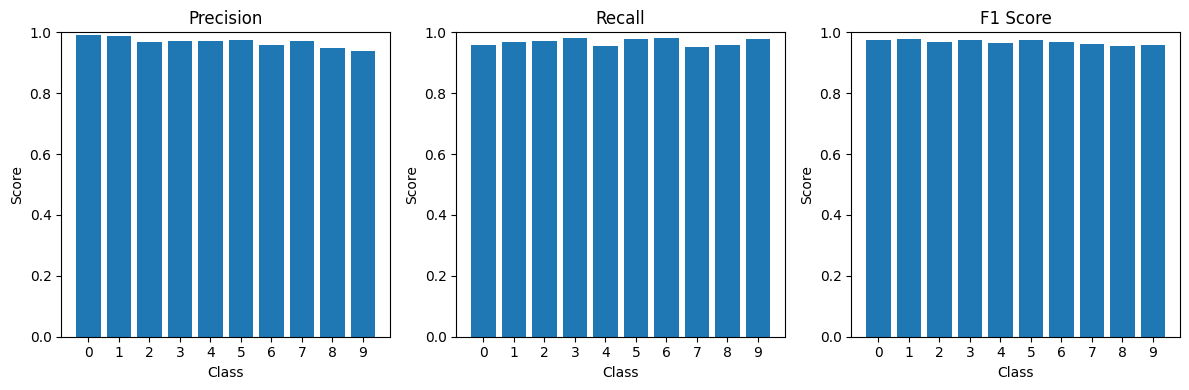

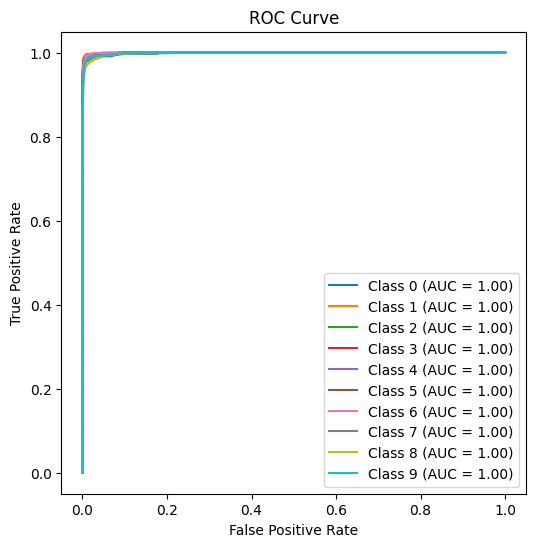

Confusion Matrix:
[[ 940    0    3    0    3    1   16    1   12    4]
 [   0 1100    7    2    1    1    8    1   14    1]
 [   1    1 1001    2    4    0    4   10    4    5]
 [   0    0    1  990    0    8    0    4    3    4]
 [   0    1    0    0  939    0    7    4    6   25]
 [   0    0    0   11    0  873    3    1    2    2]
 [   4    1    0    2    5    4  939    0    3    0]
 [   0    4   15    4    3    0    0  980    6   16]
 [   3    2    6    5    3    6    4    4  934    7]
 [   0    3    0    2    7    4    0    5    1  987]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9592    0.9751       980
           1     0.9892    0.9692    0.9791      1135
           2     0.9690    0.9700    0.9695      1032
           3     0.9725    0.9802    0.9763      1010
           4     0.9731    0.9562    0.9646       982
           5     0.9732    0.9787    0.9760       892
           6     0.9572    0.9802    0.9685      

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support

# Get the predicted probabilities for each class
y_prob = model.predict(x_test)

# Get the predicted class for each sample
y_pred = y_prob.argmax(axis=-1)

# Generate a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, digits=4)

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the precision, recall, F1 score for each class
precision = dict()
recall = dict()
f1_score = dict()
for i in range(10):
    precision[i], recall[i], f1_score[i], _ = precision_recall_fscore_support(y_test == i, y_pred == i, average="binary")
    precision[i], recall[i], f1_score[i] = precision_recall_fscore_support(y_test == i, y_pred == i, average="binary")[:3]

# Plot the metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(range(10), precision.values())
plt.title("Precision")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(range(10))
plt.ylim(0, 1)
plt.subplot(1, 3, 2)
plt.bar(range(10), recall.values())
plt.title("Recall")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(range(10))
plt.ylim(0, 1)
plt.subplot(1, 3, 3)
plt.bar(range(10), f1_score.values())
plt.title("F1 Score")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(range(10))
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)
